<a href="https://colab.research.google.com/github/enessibest/K-Means-Project/blob/main/K_means_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
data.shape

(683277, 22)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Organization Group Code,683277.0,2.977943e+00,1.579574e+00,1.00,2.00,2.00,4.00,7.00
Year,683277.0,2.016365e+03,2.092180e+00,2013.00,2015.00,2017.00,2018.00,2020.00
Union Code,682926.0,4.925322e+02,3.309112e+02,1.00,250.00,535.00,790.00,990.00
Employee Identifier,683277.0,1.708711e+07,1.925902e+07,0.00,25450.00,50975.00,37377031.00,44346433.00
Salaries,683277.0,6.946627e+04,4.777180e+04,-68771.78,29009.54,67899.36,100416.89,651936.71
Overtime,683277.0,5.474598e+03,1.311003e+04,-12308.66,0.00,0.00,4223.39,321523.31
Other Salaries,683277.0,3.820481e+03,8.386603e+03,-19131.10,0.00,706.24,4362.88,568163.12
Total Salary,683277.0,7.857104e+04,5.575122e+04,-68771.78,31676.04,74870.42,112666.10,658867.57
Retirement,683277.0,1.365890e+04,1.011008e+04,-30621.43,4662.96,13858.16,20151.85,121952.52
Health and Dental,683277.0,9.946865e+03,5.732982e+03,-3831.09,4780.68,12500.59,14037.16,59405.23


In [ ]:
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [ ]:
data_corr=data.corr()
data_corr

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.000000,-0.000707,-0.007614,-0.000483,-0.192644,-0.297225,-0.199240,-0.264133,-0.234457,-0.226974,0.032476,-0.198581,-0.252786
Year,-0.000707,1.000000,0.005063,0.838653,0.125284,0.080808,0.006865,0.124137,0.100216,0.161185,0.102326,0.130101,0.127894
Union Code,-0.007614,0.005063,1.000000,0.006614,-0.095213,0.059542,0.126444,-0.048234,-0.108697,-0.105928,-0.325772,-0.164550,-0.077872
Employee Identifier,-0.000483,0.838653,0.006614,1.000000,0.130882,0.081802,0.007155,0.128645,0.103993,0.174044,0.094587,0.134723,0.132513
Salaries,-0.192644,0.125284,-0.095213,0.130882,1.000000,0.259388,0.256029,0.957367,0.947414,0.758175,0.727234,0.933410,0.969048
Overtime,-0.297225,0.080808,0.059542,0.081802,0.259388,1.000000,0.291799,0.501886,0.311104,0.299804,0.091990,0.291696,0.459157
Other Salaries,-0.199240,0.006865,0.126444,0.007155,0.256029,0.291799,1.000000,0.415493,0.279956,0.155871,0.051601,0.219334,0.374644
Total Salary,-0.264133,0.124137,-0.048234,0.128645,0.957367,0.501886,0.415493,1.000000,0.928071,0.745430,0.653085,0.902661,0.994326
Retirement,-0.234457,0.100216,-0.108697,0.103993,0.947414,0.311104,0.279956,0.928071,1.000000,0.782788,0.677955,0.960612,0.953180
Health and Dental,-0.226974,0.161185,-0.105928,0.174044,0.758175,0.299804,0.155871,0.745430,0.782788,1.000000,0.626897,0.896584,0.796500


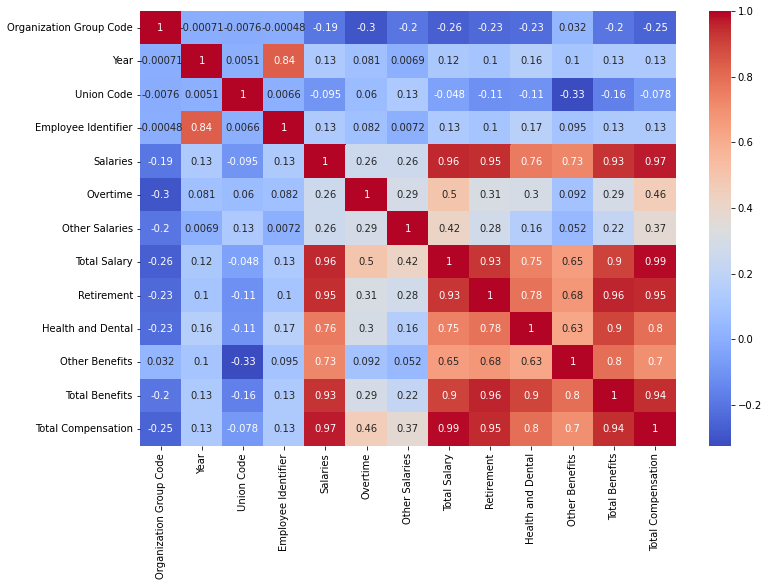

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
missing_value=data.isna().sum()
missing_value

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [ ]:
data.drop(['Total Salary','Salaries','Retirement','Total Benefits'], axis = 1, inplace=True)

In [ ]:
data.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Overtime', 'Other Salaries', 'Health and Dental', 'Other Benefits',
       'Total Compensation'],
      dtype='object')

In [ ]:
data.drop(['Year Type', 'Organization Group', 'Department Code', 'Department','Union Code', 'Union', 'Job Family', 'Job'], axis= 1, inplace=True)

In [ ]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year,Employee Identifier,Overtime,Other Salaries,Health and Dental,Other Benefits,Total Compensation
0,1,1000,1021,2013,37730,0.0,0.00,11961.34,4532.63,85281.78
1,1,1000,1023,2013,26574,0.0,0.00,7176.80,4755.14,79895.32
2,1,1000,1031,2013,8148,0.0,0.00,12918.24,4702.71,93649.71
3,1,1000,1054,2013,27436,0.0,-7058.59,12918.24,7458.76,134237.37
4,1,1000,1062,2013,37730,0.0,0.00,956.91,387.50,7512.31


In [ ]:
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year                         int64
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Health and Dental          float64
Other Benefits             float64
Total Compensation         float64
dtype: object

In [ ]:
data['Job Code'].unique()

array(['1021', '1023', '1031', ..., '1302', '1306', '0881'], dtype=object)

In [ ]:
data = data.apply(pd.to_numeric,errors='coerce')


In [ ]:
data.isna().sum()

Organization Group Code         0
Job Family Code             75909
Job Code                   103552
Year                            0
Employee Identifier             0
Overtime                        0
Other Salaries                  0
Health and Dental               0
Other Benefits                  0
Total Compensation              0
dtype: int64

In [ ]:
data['Job Code']=data['Job Code'].fillna(data['Job Code'].mean())

In [ ]:
data['Job Family Code']=data['Job Family Code'].fillna(data['Job Family Code'].mean())

In [ ]:
data.isna().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year                       0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Health and Dental          0
Other Benefits             0
Total Compensation         0
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data)

KMeans(n_clusters=3)

In [ ]:
#to find center of clusters
print(model.cluster_centers_)


[[2.96965541e+00 4.66297377e+03 4.89271766e+03 2.01775273e+03
  3.73179028e+07 6.43355017e+03 3.81086100e+03 1.07638301e+04
  5.27175015e+03 1.13938612e+05]
 [2.97876299e+00 4.75441752e+03 4.89410112e+03 2.01483858e+03
  2.85074106e+04 4.53039787e+03 3.77024563e+03 9.08265749e+03
  4.73511361e+03 9.89961246e+04]
 [2.98721026e+00 4.60717128e+03 4.83062434e+03 2.01942831e+03
  4.16024191e+07 7.17677377e+03 4.04565718e+03 1.16400535e+04
  5.75104590e+03 1.25575354e+05]]


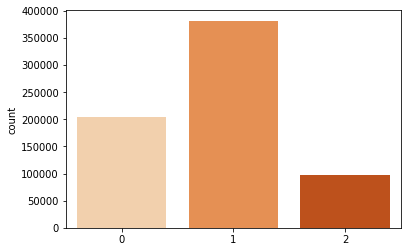

In [ ]:
sns.countplot(x=model.labels_, palette='Oranges')
plt.show()


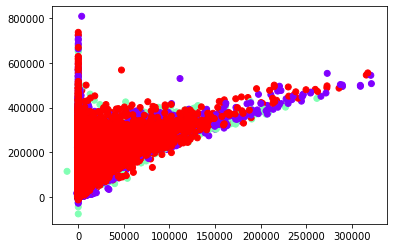

In [ ]:
plt.scatter(data.iloc[:,5].values,data.iloc[:,-1].values, c=model.labels_, cmap="rainbow")

plt.show()
